In [4]:
# Getting Started with a Movie Recommendation
# The Age of Recommender Systems
# Movie Recommendation System using TMDB 5000 Movie Dataset

# https://www.kaggle.com/saurabh00/getting-started-with-a-movie-recommendation
# https://www.kaggle.com/tmdb/tmdb-movie-metadata

# I studied on Saturday, April 20, 2019, 7PM (Sat, 4/20/2019).

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
#df1=pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_credits.csv')
#df2=pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_movies.csv')
df1=pd.read_csv('tmdb_5000_credits.csv')
df2=pd.read_csv('tmdb_5000_movies.csv')
df1.head(2)
"""The first dataset contains the following features:-
movie_id - A unique identifier for each movie.
cast - The name of lead and supporting actors.
crew - The name of Director, Editor, Composer, Writer etc."""

'The first dataset contains the following features:-\nmovie_id - A unique identifier for each movie.\ncast - The name of lead and supporting actors.\ncrew - The name of Director, Editor, Composer, Writer etc.'

In [6]:
df2.head(2)
"""The second dataset has the following features:-
budget - The budget in which the movie was made.
genre - The genre of the movie, Action, Comedy ,Thriller etc.
homepage - A link to the homepage of the movie.
id - This is infact the movie_id as in the first dataset.
keywords - The keywords or tags related to the movie.
original_language - The language in which the movie was made.
original_title - The title of the movie before translation or adaptation.
overview - A brief description of the movie.
popularity - A numeric quantity specifying the movie popularity.
production_companies - The production house of the movie.
production_countries - The country in which it was produced.
release_date - The date on which it was released.
revenue - The worldwide revenue generated by the movie.
runtime - The running time of the movie in minutes.
status - "Released" or "Rumored".
tagline - Movie's tagline.
title - Title of the movie.
vote_average - average ratings the movie recieved.
vote_count - the count of votes recieved."""

'The second dataset has the following features:-\nbudget - The budget in which the movie was made.\ngenre - The genre of the movie, Action, Comedy ,Thriller etc.\nhomepage - A link to the homepage of the movie.\nid - This is infact the movie_id as in the first dataset.\nkeywords - The keywords or tags related to the movie.\noriginal_language - The language in which the movie was made.\noriginal_title - The title of the movie before translation or adaptation.\noverview - A brief description of the movie.\npopularity - A numeric quantity specifying the movie popularity.\nproduction_companies - The production house of the movie.\nproduction_countries - The country in which it was produced.\nrelease_date - The date on which it was released.\nrevenue - The worldwide revenue generated by the movie.\nruntime - The running time of the movie in minutes.\nstatus - "Released" or "Rumored".\ntagline - Movie\'s tagline.\ntitle - Title of the movie.\nvote_average - average ratings the movie recieved

In [7]:
# Let's join the two dataset on the 'id' column
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

# Just a peak at our data.
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [8]:
# Demographic Filtering (1 of 3)
"""
Demographic Filtering- They offer generalized recommendations to 
every user, based on movie popularity and/or genre. 
The System recommends the same movies to users with similar 
demographic features. Since each user is different , 
this approach is considered to be too simple. 
The basic idea behind this system is that movies that are 
more popular and critically acclaimed will have a higher 
probability of being liked by the average audience.

We can use the average ratings of the movie as the score 
but using this won't be fair enough 
since a movie with 8.9 average rating and only 3 votes 
cannot be considered better than the movie with 7.8 
as as average rating but 40 votes. 

So, I'll be using IMDB's weighted rating (wr) which is given as :

where,
v is the number of votes for the movie;
m is the minimum votes required to be listed in the chart;

R is the average rating of the movie; And
C is the mean vote across the whole report
We already have v(vote_count) and R (vote_average) and C can be calculated as
weighted_rating() = (v/(v+m) * R) + (m/(m+v) * C)
"""

"\nDemographic Filtering- They offer generalized recommendations to \nevery user, based on movie popularity and/or genre. \nThe System recommends the same movies to users with similar \ndemographic features. Since each user is different , \nthis approach is considered to be too simple. \nThe basic idea behind this system is that movies that are \nmore popular and critically acclaimed will have a higher \nprobability of being liked by the average audience.\n\nWe can use the average ratings of the movie as the score \nbut using this won't be fair enough \nsince a movie with 8.9 average rating and only 3 votes \ncannot be considered better than the movie with 7.8 \nas as average rating but 40 votes. \n\nSo, I'll be using IMDB's weighted rating (wr) which is given as :\n\nwhere,\nv is the number of votes for the movie;\nm is the minimum votes required to be listed in the chart;\n\nR is the average rating of the movie; And\nC is the mean vote across the whole report\nWe already have v(vote_

In [9]:
C= df2['vote_average'].mean()
C

6.092171559442016

In [10]:
m= df2['vote_count'].quantile(0.9)
m

1838.4000000000015

In [11]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 23)

In [12]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [13]:
q_movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [14]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)
q_movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew,score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050669


In [15]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0.5, 1.0, 'Popular Movies')

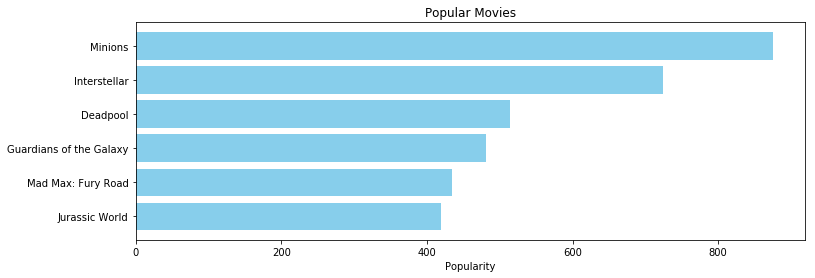

In [16]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

In [17]:
"""Now something to keep in mind is that these demographic recommender 
provide a general chart of recommended movies to all the users. 
They are not sensitive to the interests and tastes of a particular user.
This is when we move on to a more refined system- Content Basesd Filtering."""

'Now something to keep in mind is that these demographic recommender \nprovide a general chart of recommended movies to all the users. \nThey are not sensitive to the interests and tastes of a particular user.\nThis is when we move on to a more refined system- Content Basesd Filtering.'

In [18]:
# Content Based Filtering
"""In this recommender system the content of the movie (overview, cast, 
crew, keyword, tagline etc) is used to find its similarity 
with other movies. 
Then the movies that are most likely to be similar are recommended."""

'In this recommender system the content of the movie (overview, cast, \ncrew, keyword, tagline etc) is used to find its similarity \nwith other movies. \nThen the movies that are most likely to be similar are recommended.'

In [19]:
"""Content Based Filtering- They suggest similar items based on 
a particular item. This system uses item metadata, such as genre, 
director, description, actors, etc. for movies, to make these 
recommendations. The general idea behind these recommender systems 
is that if a person liked a particular item, 
he or she will also like an item that is similar to it."""

'Content Based Filtering- They suggest similar items based on \na particular item. This system uses item metadata, such as genre, \ndirector, description, actors, etc. for movies, to make these \nrecommendations. The general idea behind these recommender systems \nis that if a person liked a particular item, \nhe or she will also like an item that is similar to it.'

In [20]:
"""Collaborative Filtering- This system matches persons with similar 
interests and provides recommendations based on this matching. 
Collaborative filters do not require item metadata like 
its content-based counterparts. Let's load the data now."""

"Collaborative Filtering- This system matches persons with similar \ninterests and provides recommendations based on this matching. \nCollaborative filters do not require item metadata like \nits content-based counterparts. Let's load the data now."

In [21]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [22]:
"""Plot description based Recommender
We will compute pairwise similarity scores for all movies based on 
their plot descriptions and recommend movies based on that similarity 
score. The plot description is given in the overview feature of our 
dataset.
For any of you who has done even a bit of text processing before knows 
we need to convert the word vector of each overview. 
Now we'll compute Term Frequency-Inverse Document Frequency (TF-IDF) 
vectors for each overview."""

"Plot description based Recommender\nWe will compute pairwise similarity scores for all movies based on \ntheir plot descriptions and recommend movies based on that similarity \nscore. The plot description is given in the overview feature of our \ndataset.\nFor any of you who has done even a bit of text processing before knows \nwe need to convert the word vector of each overview. \nNow we'll compute Term Frequency-Inverse Document Frequency (TF-IDF) \nvectors for each overview."

In [23]:
"""Term frequency, it is the relative frequency of a word in a document 
and is given as (term instances/total instances). 

Inverse Document Frequency is the relative count of documents 
containing the term is given as log(number of documents/documents with term)

The overall importance of each word to the documents in which 
they appear is equal to TF * IDF """

'Term frequency, it is the relative frequency of a word in a document \nand is given as (term instances/total instances). \n\nInverse Document Frequency is the relative count of documents \ncontaining the term is given as log(number of documents/documents with term)\n\nThe overall importance of each word to the documents in which \nthey appear is equal to TF * IDF '

In [24]:
"""This will give you a matrix where each column represents a word 
in the overview vocabulary (all the words that appear in at least one document) 
and each row represents a movie, as before.
column = a word, row = a movie
This is done to reduce the importance of words that occur frequently 
in plot overviews and therefore, their significance in computing the 
final similarity score.
Fortunately, scikit-learn gives you a built-in TfIdfVectorizer class 
that produces the TF-IDF matrix in a couple of lines."""

'This will give you a matrix where each column represents a word \nin the overview vocabulary (all the words that appear in at least one document) \nand each row represents a movie, as before.\ncolumn = a word, row = a movie\nThis is done to reduce the importance of words that occur frequently \nin plot overviews and therefore, their significance in computing the \nfinal similarity score.\nFortunately, scikit-learn gives you a built-in TfIdfVectorizer class \nthat produces the TF-IDF matrix in a couple of lines.'

In [25]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

In [26]:
"""We see that over 20,000 different words were used to describe 
the 4800 movies in our dataset.

With this matrix in hand, we can now compute a similarity score. 
There are several candidates for this; such as the euclidean, 
the Pearson and the cosine similarity scores.
There is no right answer to which score is the best. 
Different scores work well in different scenarios and it is often 
a good idea to experiment with different metrics.

We will be using the cosine similarity to calculate a numeric quantity 
that denotes the similarity between two movies. We use the cosine 
similarity score since it is independent of magnitude and is 
relatively easy and fast to calculate. Mathematically, it is defined as follows:

Since we have used the TF-IDF vectorizer, calculating the dot product 
will directly give us the cosine similarity score. Therefore, we will 
use sklearn's linear_kernel() instead of cosine_similarities() 
since it is faster. """

"We see that over 20,000 different words were used to describe \nthe 4800 movies in our dataset.\n\nWith this matrix in hand, we can now compute a similarity score. \nThere are several candidates for this; such as the euclidean, \nthe Pearson and the cosine similarity scores.\nThere is no right answer to which score is the best. \nDifferent scores work well in different scenarios and it is often \na good idea to experiment with different metrics.\n\nWe will be using the cosine similarity to calculate a numeric quantity \nthat denotes the similarity between two movies. We use the cosine \nsimilarity score since it is independent of magnitude and is \nrelatively easy and fast to calculate. Mathematically, it is defined as follows:\n\nSince we have used the TF-IDF vectorizer, calculating the dot product \nwill directly give us the cosine similarity score. Therefore, we will \nuse sklearn's linear_kernel() instead of cosine_similarities() \nsince it is faster. "

In [27]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

#Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [28]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object

In [29]:
"""While our system has done a decent job of finding movies with similar 
plot descriptions, the quality of recommendations is not that great. 
"The Dark Knight Rises" returns all Batman movies while it is more 
likely that the people who liked that movie are more inclined to enjoy 
other Christopher Nolan movies. This is something that cannot be 
captured by the present system. """

'While our system has done a decent job of finding movies with similar \nplot descriptions, the quality of recommendations is not that great. \n"The Dark Knight Rises" returns all Batman movies while it is more \nlikely that the people who liked that movie are more inclined to enjoy \nother Christopher Nolan movies. This is something that cannot be \ncaptured by the present system. '

In [30]:
"""Credits, Genres and Keywords Based Recommender

It goes without saying that the quality of our recommender would be 
increased with the usage of better metadata. 
That is exactly what we are going to do in this section. 

We are going to build a recommender based on the following metadata: 
    the 3 top actors, the director, related genres and the movie plot 
    keywords.

From the cast, crew and keywords features, we need to extract the 
three most important actors, the director and the keywords associated 
with that movie. 

Right now, our data is present in the form of "stringified" lists , 
we need to convert it into a safe and usable structure."""

'Credits, Genres and Keywords Based Recommender\n\nIt goes without saying that the quality of our recommender would be \nincreased with the usage of better metadata. \nThat is exactly what we are going to do in this section. \n\nWe are going to build a recommender based on the following metadata: \n    the 3 top actors, the director, related genres and the movie plot \n    keywords.\n\nFrom the cast, crew and keywords features, we need to extract the \nthree most important actors, the director and the keywords associated \nwith that movie. \n\nRight now, our data is present in the form of "stringified" lists , \nwe need to convert it into a safe and usable structure.'

In [31]:
# Credits, Genres and Keywords Based Recommender
# 

# Parse the stringified features into their corresponding python objects

from ast import literal_eval  
# ast(Abstract Syntax Trees) module
# eval(),  ast.literal_eval(str)

features = ['cast', 'crew', 'keywords', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)


# Get the director's name from the crew feature. 
# If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        # Check if more than 3 elements exist. If yes, return only 
        # first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    # Return empty list in case of missing/malformed data
    return []

# Define new director, cast, genres and keywords features 
# that are in a suitable form.
df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

# Print the new features of the first 3 films
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [32]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

        
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)


df2.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,tittle,cast,crew,director,soup
0,237000000,"[action, adventure, fantasy]",http://www.avatarmovie.com/,19995,"[cultureclash, future, spacewar]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[samworthington, zoesaldana, sigourneyweaver]","[{'job': 'Editor', 'department': 'Editing', 'g...",jamescameron,cultureclash future spacewar samworthington zo...


In [33]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

# Reset index of our main DataFrame and construct reverse mapping as before
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

In [34]:
get_recommendations('The Godfather', cosine_sim2)

867      The Godfather: Part III
2731      The Godfather: Part II
4638    Amidst the Devil's Wings
2649           The Son of No One
1525              Apocalypse Now
1018             The Cotton Club
1170     The Talented Mr. Ripley
1209               The Rainmaker
1394               Donnie Brasco
1850                    Scarface
Name: title, dtype: object

In [35]:
"""Collaborative Filtering

Since the dataset we used before did not have userId(which is 
necessary for collaborative filtering) let's load another dataset. 
We'll be using the Surprise library to implement SVD.
"""    

"Collaborative Filtering\n\nSince the dataset we used before did not have userId(which is \nnecessary for collaborative filtering) let's load another dataset. \nWe'll be using the Surprise library to implement SVD.\n"

In [37]:
from surprise import Reader, Dataset, SVD, evaluate
reader = Reader()
ratings = pd.read_csv('ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [38]:
# Note that in this dataset movies are rated on a scale of 
#5 unlike the earlier one.

data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
data.split(n_folds=5)

svd = SVD()
evaluate(svd, data, measures=['RMSE', 'MAE'])

C:\Users\USER\Anaconda3\envs\tensorflow-gpu\lib\site-packages\surprise\evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
C:\Users\USER\Anaconda3\envs\tensorflow-gpu\lib\site-packages\surprise\dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 0.8936
MAE:  0.6887
------------
Fold 2
RMSE: 0.8952
MAE:  0.6876
------------
Fold 3
RMSE: 0.8929
MAE:  0.6895
------------
Fold 4
RMSE: 0.9036
MAE:  0.6936
------------
Fold 5
RMSE: 0.9006
MAE:  0.6930
------------
------------
Mean RMSE: 0.8972
Mean MAE : 0.6905
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'mae': [0.6886839793667033,
                             0.6876374669952479,
                             0.689530417624154,
                             0.6935767163161572,
                             0.6930478472003491],
                            'rmse': [0.8935551007818479,
                             0.895242719602787,
                             0.8929151123448432,
                             0.9036043248857065,
                             0.900583065056746]})

In [39]:
# We get a mean Root Mean Sqaure Error of 0.89 approx which 
# is more than good enough for our case. Let us now train 
# on our dataset and arrive at predictions.
trainset = data.build_full_trainset()
svd.fit(trainset)

In [40]:
# Let us pick user with user Id 1 and check the ratings she/he has given.

ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [41]:
svd.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.928888690019574, details={'was_impossible': False})

In [ ]:
# For movie with ID 302, we get an estimated prediction of 2.618. 
# One startling feature of this recommender system is that 
# it doesn't care what the movie is (or what it contains). 
# It works purely on the basis of an assigned movie ID and tries 
# to predict ratings based on how the other users have predicted the movie.

"""
Conclusion
We create recommenders using demographic , content- based and 
collaborative filtering. 
While demographic filtering is very elemantary 
and cannot be used practically, 
Hybrid Systems can take advantage of content-based and collaborative filtering 
as the two approaches are proved to be almost complimentary. 

This model was very baseline and only provides a fundamental framework 
to start with.

I would like to mention some excellent refereces that I learned from

https://hackernoon.com/introduction-to-recommender-system-part-1-collaborative-filtering-singular-value-decomposition-44c9659c5e75

    https://www.kaggle.com/rounakbanik/movie-recommender-systems

        http://trouvus.com/wp-content/uploads/2016/03/A-hybrid-movie-recommender-system-based-on-neural-networks.pdf

    If you enjoyed reading the kernel , hit the upvote button !
"""